First Trial of Project

In [1]:
#Importing Relevant Packages
import numpy as np
import pandas as pd
import random as rnd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_palette('Set2')
rc = {'axes.facecolor':'white',
      'axes.grid' : True,
      'grid.color': '.8'}
plt.rcParams.update(rc)

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the CSV files into the notebook
survey = pd.read_csv('mental-heath-in-tech-2016.csv')

In [3]:
survey.head()

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes


In [4]:
# Getting a more detailed view of the columns,its index, and the values
real_features=(list(survey))
for index,val in enumerate(real_features):
    p=survey[val].unique()
    print(index,val)
    print(p)
    print('\n')

0 Are you self-employed?
[0 1]


1 How many employees does your company or organization have?
['26-100' '6-25' nan 'More than 1000' '100-500' '500-1000' '1-5']


2 Is your employer primarily a tech company/organization?
[ 1. nan  0.]


3 Is your primary role within your company related to tech/IT?
[nan  1.  0.]


4 Does your employer provide mental health benefits as part of healthcare coverage?
['Not eligible for coverage / N/A' 'No' nan 'Yes' "I don't know"]


5 Do you know the options for mental health care available under your employer-provided coverage?
[nan 'Yes' 'I am not sure' 'No']


6 Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?
['No' 'Yes' nan "I don't know"]


7 Does your employer offer resources to learn more about mental health concerns and options for seeking help?
['No' 'Yes' nan "I don't know"]


8 Is your anonymity protected if you choose to take advantage of mental health or sub

In [5]:
survey = survey.iloc[:,[0,1,4,6,7,8,9,10,12,13,15,16,18,21,38,39,40,42,46,47,50,51,52,55,56,57,58,59,60,61,62]]

In [6]:
survey.head()

,Are you self-employed?,How many employees does your company or organization have?,Does your employer provide mental health benefits as part of healthcare coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Would you feel comfortable discussing a mental health disorder with your coworkers?,Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?,...,"If so, what condition(s) were you diagnosed with?",Have you ever sought treatment for a mental health issue from a mental health professional?,What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,0,26-100,Not eligible for coverage / N/A,No,No,I don't know,Very easy,No,Maybe,Yes,...,"Anxiety Disorder (Generalized, Social, Phobia,...",0,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,No,Yes,Yes,Yes,Somewhat easy,No,Maybe,Yes,...,"Anxiety Disorder (Generalized, Social, Phobia,...",1,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,No,No,No,I don't know,Neither easy nor difficult,Maybe,Maybe,Maybe,...,NaN,1,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Anxiety Disorder (Generalized, Social, Phobia,...",1,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,6-25,Yes,No,No,No,Neither easy nor difficult,Yes,Maybe,No,...,"Anxiety Disorder (Generalized, Social, Phobia,...",1,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes


In [7]:
#Renaming the columns with shorter names 

survey.columns = ['self_employed','total_employees','mental_health_benefits','discussion_of_mental_health_by_employers',
                'resource_from_employers','anonimity_when_seeking_help','ease_of_medical_leave','negative_consequences_for_discussing',
                'comfortable_discussing_with_coworkers','comfortable_discussing_with_supervisors','observed_negative_consequences',
               'medical_coverage','revealed_disorder_to_clients','revealed_disorder_to_coworkers','bring_up_during_interview','why_bring_up',
                'will_mental_illness_hurt_career','share_with_family','mental_disorder_in_past','mental_disorder_now','ever_diagnosed',
                'diagnosis','sought_treatment','age','gender','country_of_residence','state_of_residence','country_of_work','work_state',
                'work_position','work_remotely']

In [8]:
#Including responses of people living and working in the US only
survey = survey[survey['country_of_work']=='United States of America']
survey = survey[survey['country_of_residence']=='United States of America']

#Including responses of people who are not self-employed 
survey = survey[survey['self_employed']==0]

In [9]:
survey.drop(['self_employed','country_of_residence','country_of_work'],axis=1,inplace=True)

In [10]:
survey.head()

,total_employees,mental_health_benefits,discussion_of_mental_health_by_employers,resource_from_employers,anonimity_when_seeking_help,ease_of_medical_leave,negative_consequences_for_discussing,comfortable_discussing_with_coworkers,comfortable_discussing_with_supervisors,observed_negative_consequences,...,mental_disorder_now,ever_diagnosed,diagnosis,sought_treatment,age,gender,state_of_residence,work_state,work_position,work_remotely
1,6-25,No,Yes,Yes,Yes,Somewhat easy,No,Maybe,Yes,No,...,Yes,Yes,"Anxiety Disorder (Generalized, Social, Phobia,...",1,29,male,Illinois,Illinois,Back-end Developer|Front-end Developer,Never
4,6-25,Yes,No,No,No,Neither easy nor difficult,Yes,Maybe,No,No,...,Yes,Yes,"Anxiety Disorder (Generalized, Social, Phobia,...",1,43,Female,Illinois,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes
6,26-100,I don't know,No,No,I don't know,Somewhat easy,No,Maybe,Yes,No,...,No,No,NaN,0,30,M,Tennessee,Tennessee,Back-end Developer,Sometimes
7,More than 1000,Yes,No,Yes,Yes,Very easy,No,Maybe,Yes,No,...,Yes,Yes,"Anxiety Disorder (Generalized, Social, Phobia,...",1,37,female,Virginia,Virginia,Dev Evangelist/Advocate|Back-end Developer,Always
8,26-100,I don't know,No,No,I don't know,Very difficult,Yes,Yes,Maybe,No,...,Yes,Yes,"Mood Disorder (Depression, Bipolar Disorder, etc)",1,44,Female,California,California,Support|Back-end Developer|One-person shop,Sometimes


In [11]:
#dropping them since they are for self-employed peoples only
survey.drop(['medical_coverage','revealed_disorder_to_clients','revealed_disorder_to_coworkers'],axis=1,inplace=True)

In [12]:
#replace the 1 and 0 with yes and no respectively in order to keep it categorical 
survey['sought_treatment'] = survey['sought_treatment'].replace([
    0], 'No')
survey['sought_treatment'] = survey['sought_treatment'].replace([
    1], 'Yes')
survey['sought_treatment'].unique()

array(['Yes', 'No'], dtype=object)

In [13]:
#The range incorrectly got saved and imported as the month so correcting it with the appropiate values 
survey['total_employees'] = survey['total_employees'].replace([
    '25-Jun'], '6-25')
survey['total_employees'] = survey['total_employees'].replace([
    '5-Jan'], '1-5')
survey['total_employees'].unique()

array(['6-25', '26-100', 'More than 1000', '100-500', '500-1000', '1-5'],
      dtype=object)

In [14]:
survey.describe()

,age
count,708.000000
mean,34.396893
std,13.750838
min,19.000000
25%,28.000000
50%,32.000000
75%,38.000000
max,323.000000


In [15]:

survey.describe(include=['O'])

,total_employees,mental_health_benefits,discussion_of_mental_health_by_employers,resource_from_employers,anonimity_when_seeking_help,ease_of_medical_leave,negative_consequences_for_discussing,comfortable_discussing_with_coworkers,comfortable_discussing_with_supervisors,observed_negative_consequences,...,mental_disorder_in_past,mental_disorder_now,ever_diagnosed,diagnosis,sought_treatment,gender,state_of_residence,work_state,work_position,work_remotely
count,708,708,708,708,708,708,708,708,708,708,...,708,708,708,391,708,706,708,708,708,708
unique,6,4,3,3,3,6,3,3,3,2,...,3,3,2,65,2,44,47,48,124,3
top,26-100,Yes,No,No,I don't know,Somewhat easy,Maybe,Maybe,Yes,No,...,Yes,Yes,Yes,"Mood Disorder (Depression, Bipolar Disorder, etc)",Yes,Male,California,California,Back-end Developer,Sometimes
freq,179,427,503,265,455,162,307,303,271,653,...,400,327,393,95,453,295,110,118,133,405


In [16]:
#replacing the weird ages with the mean age instead of dropping the row
survey.loc[(survey['age'] > 90), 'age'] = 34
survey.loc[(survey['age'] < 10), 'age'] = 34

In [18]:
# clean the genders by grouping the genders into 3 categories: Female, Male, Genderqueer/Other
survey['gender'] = survey['gender'].replace([
    'male', 'Male ', 'M', 'm', 'Cis male',
    'Male.', 'Male (cis)', 'Man', 'Sex is male',
    'cis male', 'Dude', 'mail', 'male ', 'Cis Male',
    'cisdude', 'cis man'], 'Male')
survey['gender'] = survey['gender'].replace([
    'female', 'female ', 'F', 'Woman', 'fm', 'f',
    'Female or Multi-Gender Femme', 'Female ', 'woman', 'female/woman', 'Cisgender Female', 
    'fem', 'Female (props for making this a freeform field, though)',
    ' Female', 'Cis-woman'], 'Female')
survey['gender'] = survey['gender'].replace([
    'non-binary', 'genderqueer', 'Human',
    'genderqueer woman', 'Agender', 'Genderflux demi-girl',
    'non-binary', 'Male/genderqueer', 'none of your business',
    'Genderqueer','Genderqueer/Other','Genderfluid','Other'], 'Genderqueer/Other')

# replace the one null with Male, the mode gender, so we don't have to drop the row
survey['gender'] = survey['gender'].replace(np.nan, 'Male')
survey['gender'].unique()

array(['Male', 'Female', 'Genderqueer/Other'], dtype=object)

In [19]:
#Extracting work positions in order to graph it
position = {}

positionCounts = dict(survey['work_position'].value_counts())
for i in positionCounts:
    # getting the work position separately in case someone answered with more than one position
    positionList = i.split('|')
    for j in positionList:
        j = j.split(' (')[0]
        position[j] = position.get(j, 0) + positionCounts[i]
        

In [22]:
tmp1 = pd.DataFrame([i for i in position for _ in range(position[i])], columns=['position'])


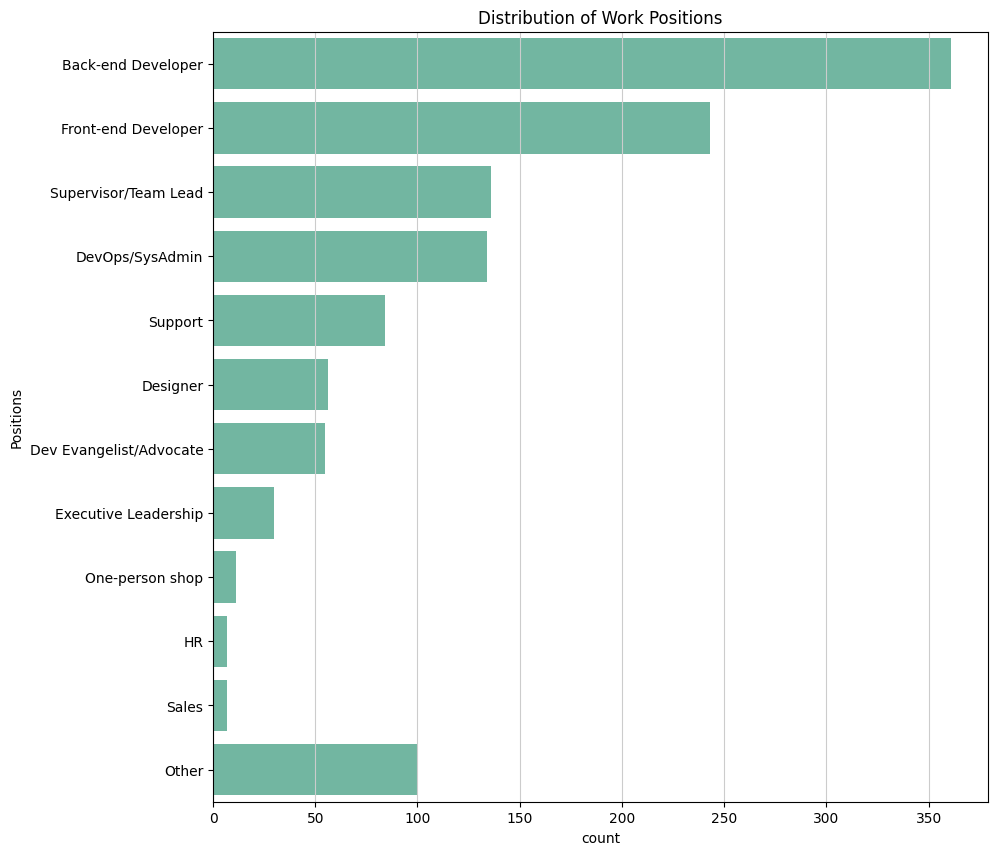

In [24]:
plt.figure(figsize=(10, 10))
g = sns.countplot(
    y=tmp1['position'],
    order=[
        'Back-end Developer', 'Front-end Developer', 'Supervisor/Team Lead',
        'DevOps/SysAdmin', 'Support', 'Designer', 'Dev Evangelist/Advocate',
        'Executive Leadership', 'One-person shop', 'HR', 'Sales', 'Other'
    ]
)
g.set_ylabel('Positions')
g.set_title('Distribution of Work Positions')
plt.show()


In [25]:
survey['total_employees'].unique()

array(['6-25', '26-100', 'More than 1000', '100-500', '500-1000', '1-5'],
      dtype=object)

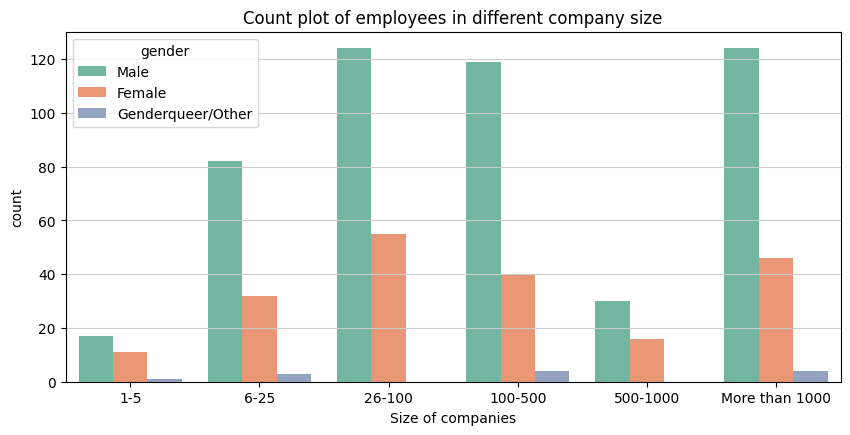

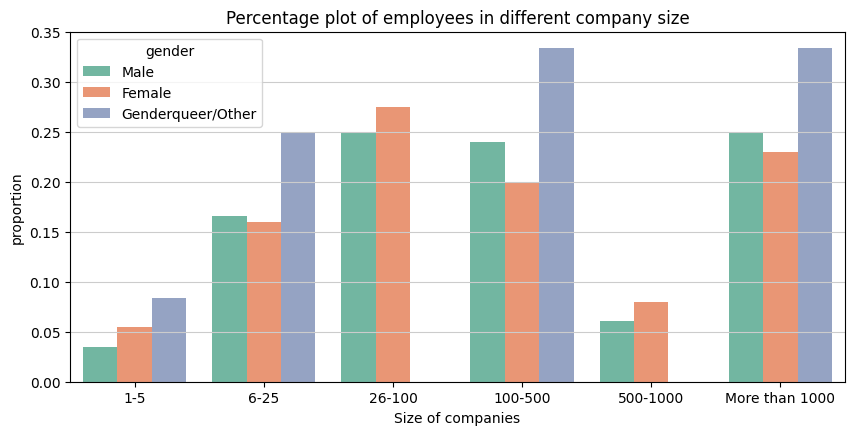

In [26]:
x, y, hue = "total_employees", "proportion", "gender"
hue_order = ["Male", "Female",'GenderQueer/Other']


plt.figure(figsize=(10,10))
plt.subplot(2,1,1)

sns.countplot(x=x, hue=hue, data=survey,order = ['1-5','6-25','26-100','100-500','500-1000','More than 1000'])
plt.xlabel('Size of companies')
plt.title('Count plot of employees in different company size')
prop_df = (survey[x]
           .groupby(survey[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())


plt.figure(figsize=(10,10))
plt.subplot(2, 1,2)

sns.barplot(x=x, y=y, hue=hue, data=prop_df, order = ['1-5','6-25','26-100','100-500','500-1000','More than 1000'],hue_order = ['Male','Female','Genderqueer/Other'])
plt.xlabel('Size of companies')
plt.title('Percentage plot of employees in different company size')
plt.show()

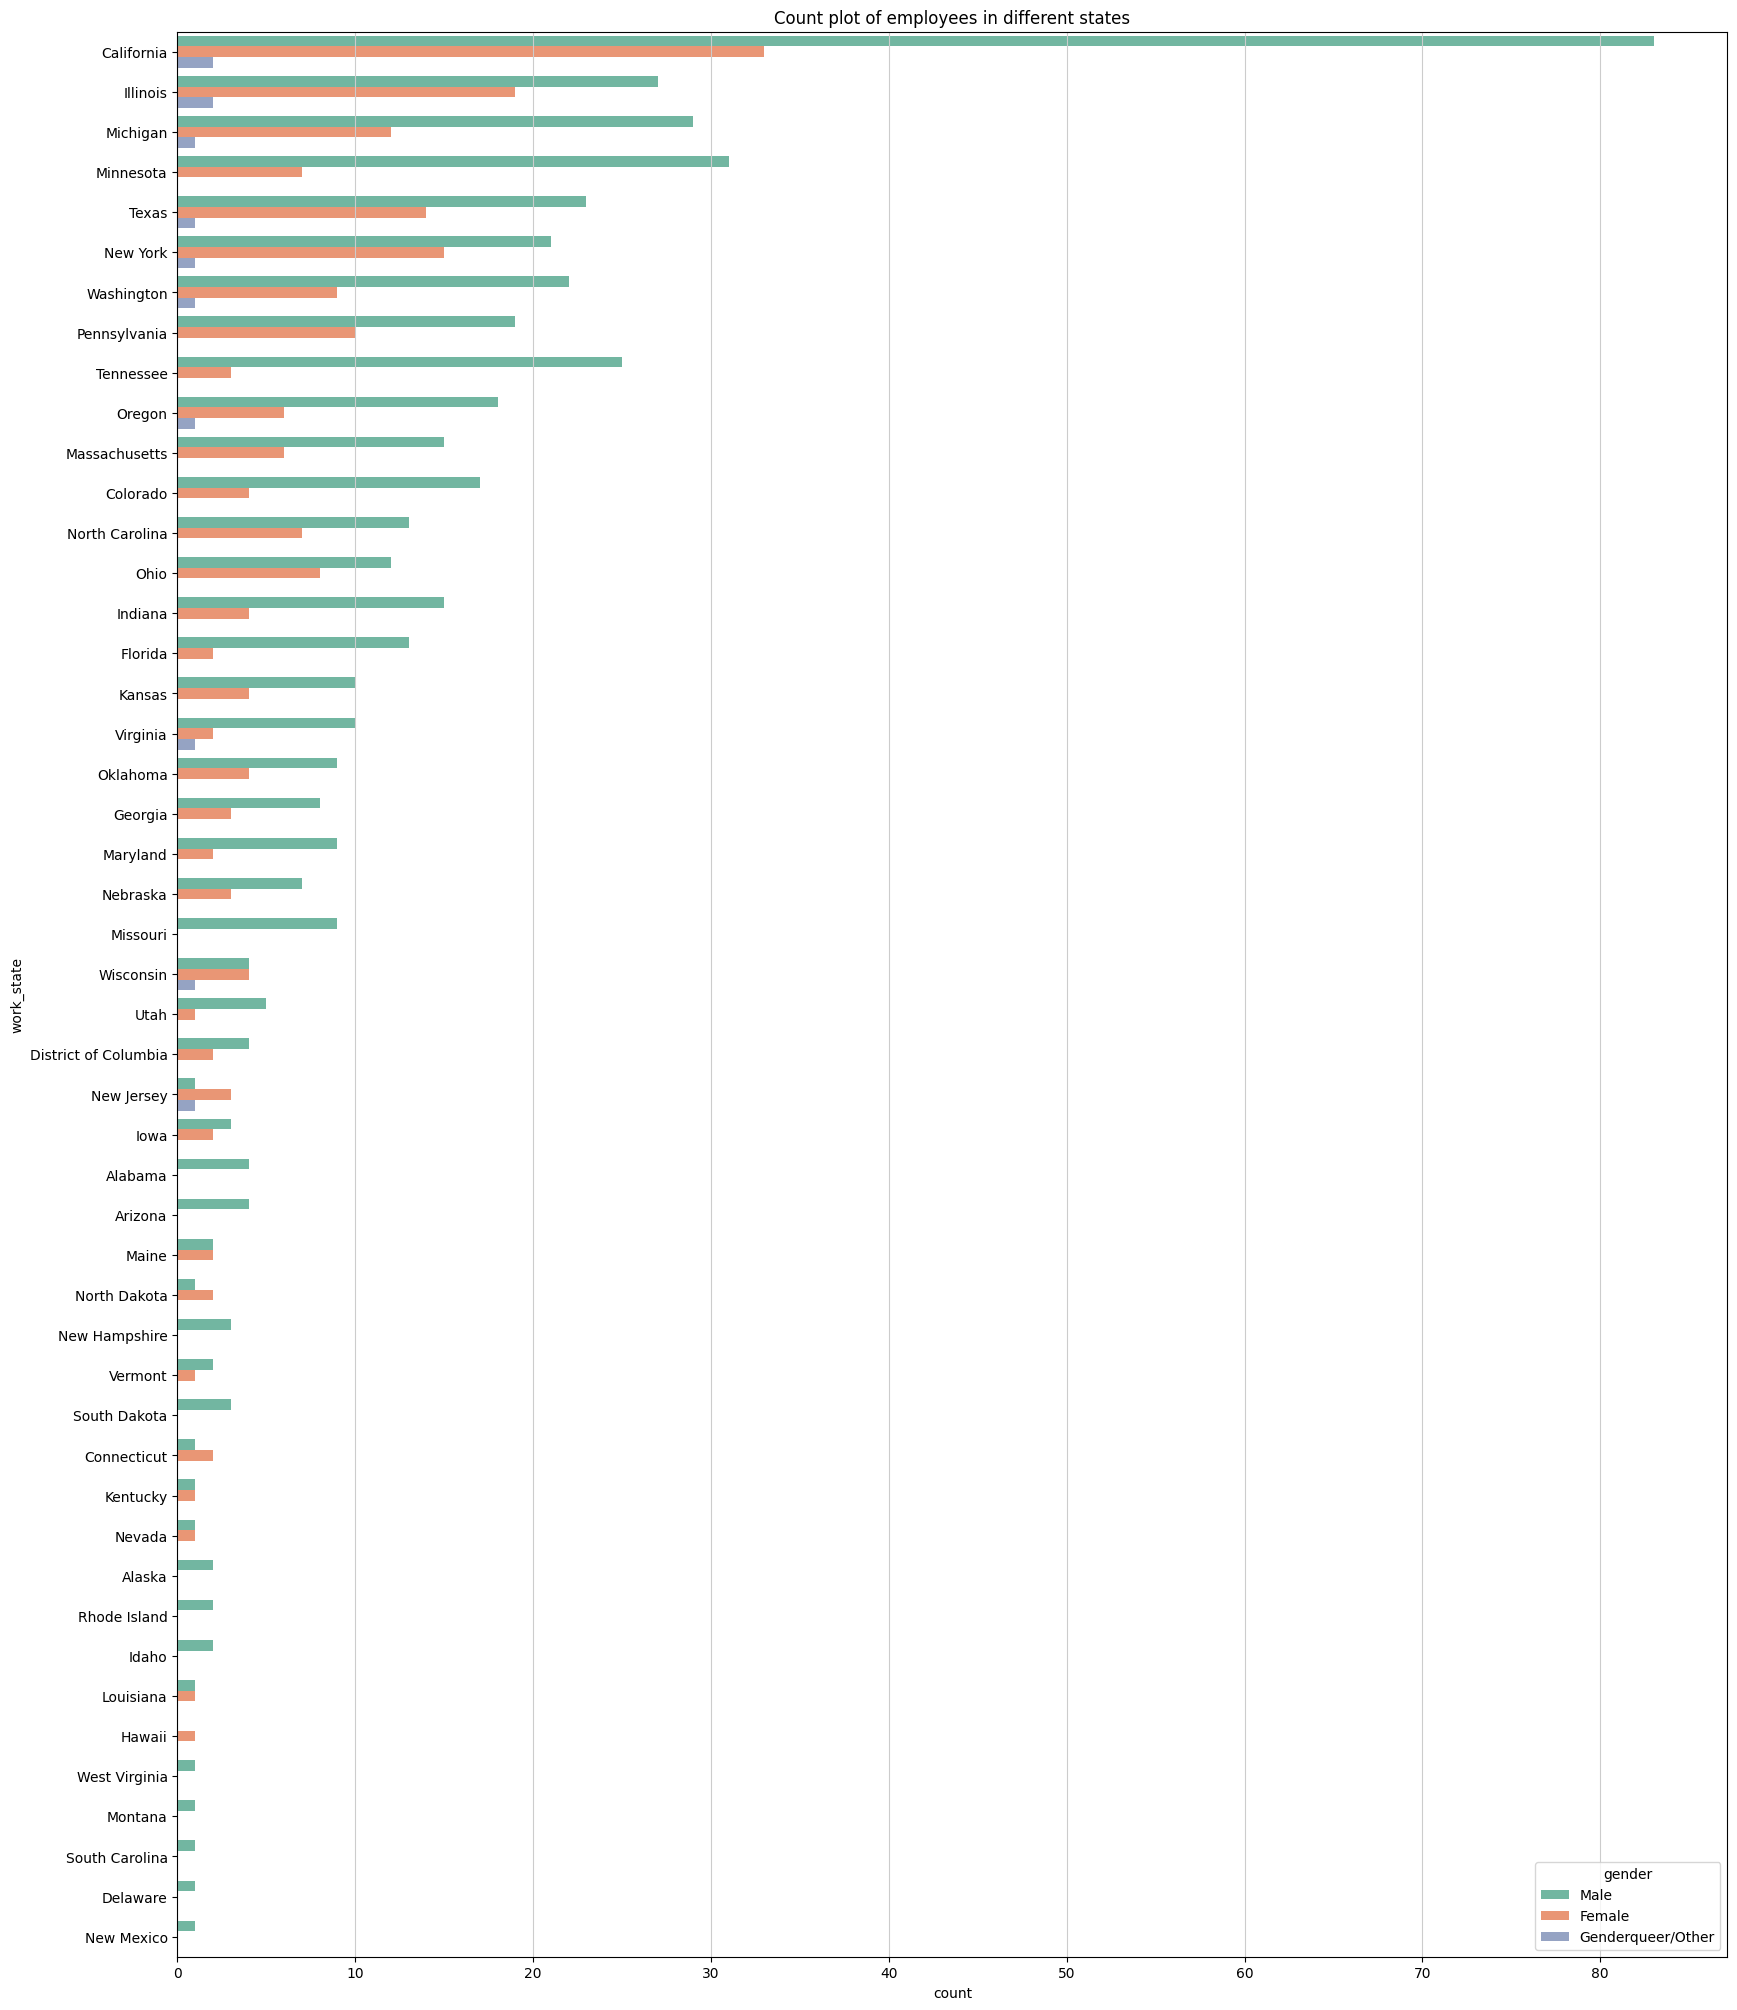

In [27]:
x, y, hue = "work_state", "prop", "gender"
hue_order = ["Male", "Female",'GenderQueer/Other']


plt.figure(figsize=(20,25))

sns.countplot(y=x, hue=hue, data=survey,order = survey['work_state'].value_counts().index)
plt.title('Count plot of employees in different states')




plt.show()

In [28]:
#Extracting work positions in order to graph it
disorders = {}

disorderCounts = dict(survey['diagnosis'].value_counts())
for i in disorderCounts:
    # get the disorders separately in case someone answered with more than one disorder
    disorderList = i.split('|')
    for j in disorderList:
        j = j.split(' (')[0]
        disorders[j] = disorders.get(j, 0) + disorderCounts[i]

In [30]:
# Yeni DataFrame oluşturma
tmp = pd.DataFrame([i for i in disorders for _ in range(disorders[i])], columns=['disorder'])

# Temizleme ve gruplama işlemleri
tmp['disorder'] = tmp['disorder'].replace([
    'Autism - while not a "mental illness", still greatly affects how I handle anxiety',
    'autism spectrum disorder', 'PDD-NOS'], 'Autism')

tmp['disorder'] = tmp['disorder'].replace(['Asperger Syndrome'], "Asperger's Syndrome")

tmp['disorder'] = tmp['disorder'].replace(['ADD', 'Attention Deficit Disorder', 'attention deficit disorder'],
                                          'Attention Deficit Hyperactivity Disorder')

tmp['disorder'] = tmp['disorder'].replace(['Schizotypal Personality Disorder'], 'Personality Disorder')

tmp['disorder'] = tmp['disorder'].replace([
    'Autism', "Asperger's Syndrome", 'Intimate Disorder',
    'Seasonal Affective Disorder', 'Burn out', 'Gender Identity Disorder',
    'Suicidal Ideation', 'Gender Dysphoria', 'MCD'], 'Others')


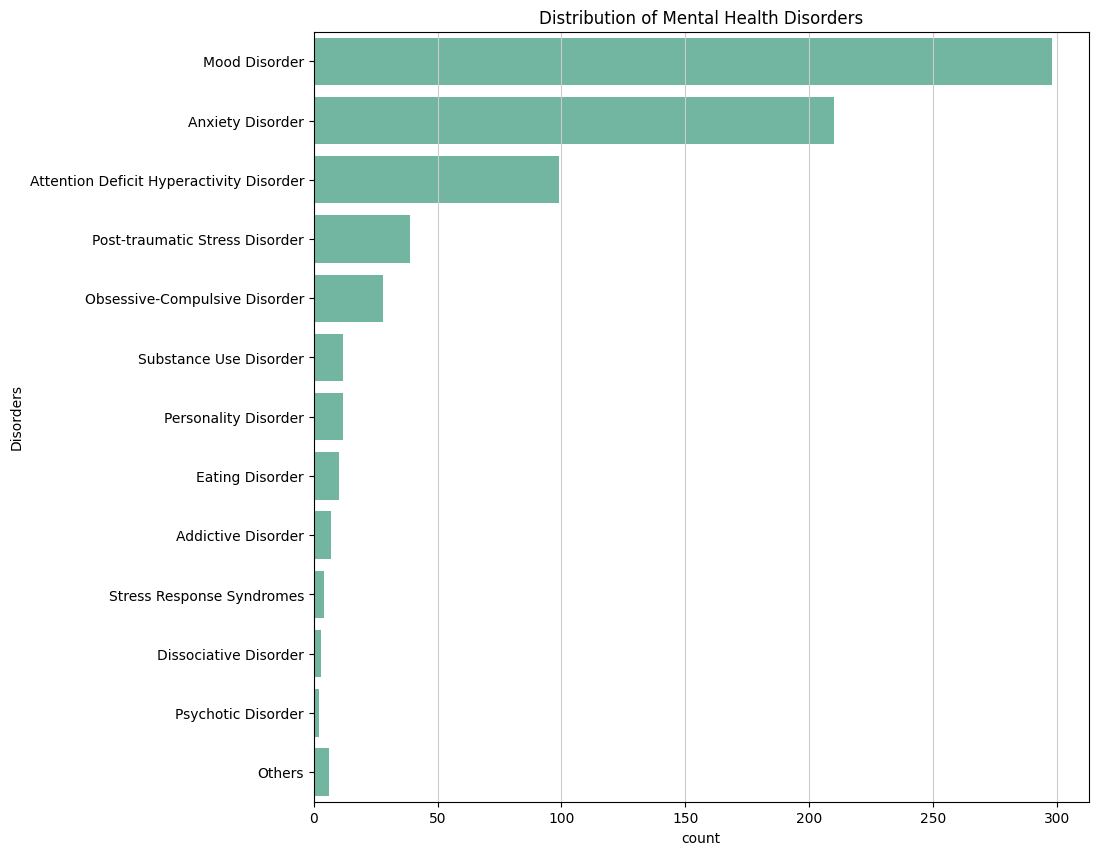

In [32]:
plt.figure(figsize=(10, 10))
g = sns.countplot(
    y=tmp['disorder'],
    order=[
        'Mood Disorder', 'Anxiety Disorder', 'Attention Deficit Hyperactivity Disorder',
        'Post-traumatic Stress Disorder', 'Obsessive-Compulsive Disorder',
        'Substance Use Disorder', 'Personality Disorder',
        'Eating Disorder', 'Addictive Disorder', 'Stress Response Syndromes',
        'Dissociative Disorder', 'Psychotic Disorder', 'Others'
    ]
)
g.set_ylabel('Disorders')
g.set_title('Distribution of Mental Health Disorders')
plt.show()


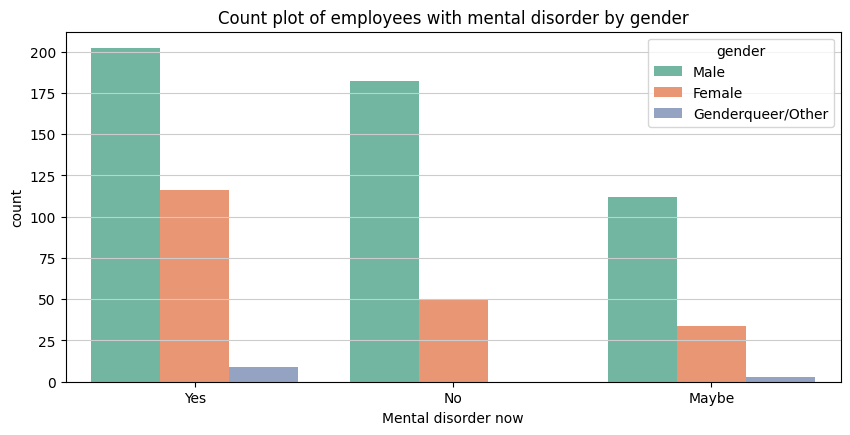

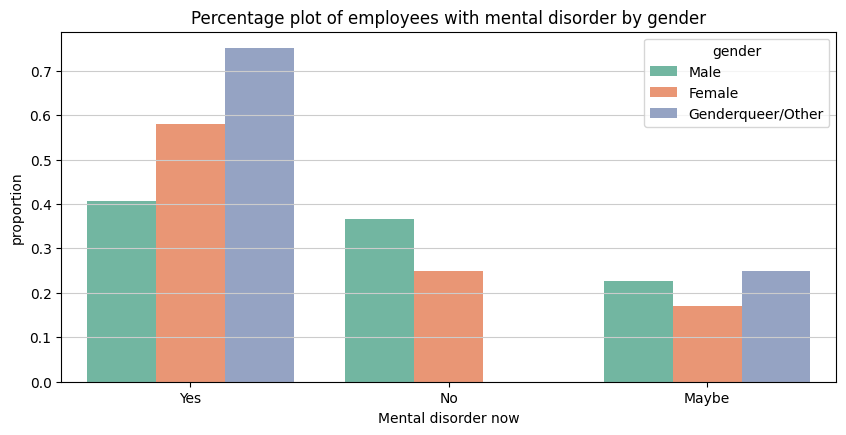

In [33]:
#Plotting count plot and percentage plot of employees with mental disorder by gender
x, y, hue = "mental_disorder_now", "proportion", "gender"
hue_order = ["Male", "Female",'GenderQueer/Other']


plt.figure(figsize=(10,10))
plt.subplot(2,1,1)

sns.countplot(x=x, hue=hue, data=survey,order = survey['mental_disorder_now'].value_counts().index)

plt.xlabel('Mental disorder now')
plt.title('Count plot of employees with mental disorder by gender')

prop_df = (survey[x]
           .groupby(survey[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())


plt.figure(figsize=(10,10))
plt.subplot(2, 1,2)

sns.barplot(x=x, y=y, hue=hue, data=prop_df,hue_order = ['Male','Female','Genderqueer/Other'])

plt.xlabel('Mental disorder now')
plt.title('Percentage plot of employees with mental disorder by gender')

plt.show()


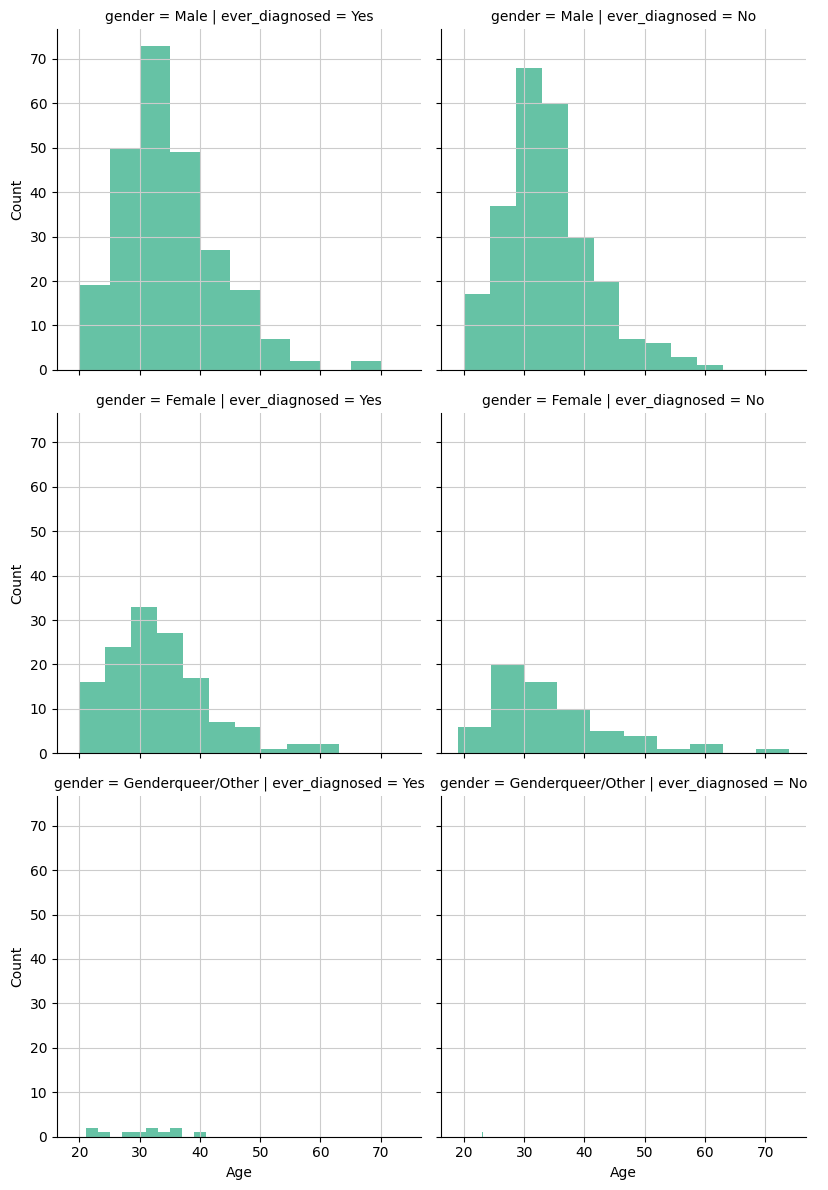

In [35]:
# Plotting Age distribution of employees using histograms
g = sns.FacetGrid(survey, row='gender', col='ever_diagnosed', height=4)
g.map(plt.hist, 'age', alpha=1, bins=10)
g.add_legend()
g.set_axis_labels('Age', 'Count')  # plt.xlabel yerine bunu kullanmak daha doğru

plt.show()


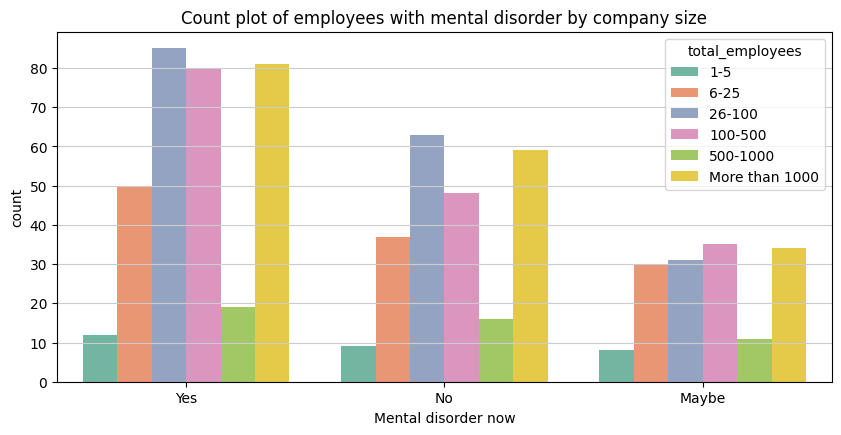

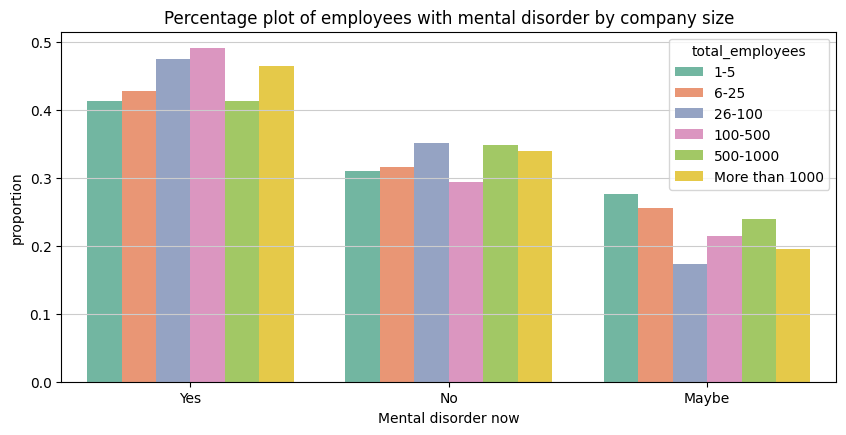

In [36]:
#Plotting count plot and percentage plot of employees with mental disorder by company size

x, y, hue = "mental_disorder_now", "proportion", "total_employees"
hue_order = ['6-25', '26-100', 'More than 1000', '100-500', '500-1000', '1-5']


plt.figure(figsize=(10,10))
plt.subplot(2,1,1)

sns.countplot(x=x, hue=hue, data=survey,order = survey['mental_disorder_now'].value_counts().index,hue_order = ['1-5','6-25', '26-100', '100-500', '500-1000','More than 1000'])
plt.xlabel('Mental disorder now')
plt.title('Count plot of employees with mental disorder by company size')

prop_df = (survey[x]
           .groupby(survey[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())


plt.figure(figsize=(10,10))
plt.subplot(2, 1,2)

sns.barplot(x=x, y=y, hue=hue, data=prop_df,hue_order = ['1-5','6-25', '26-100', '100-500', '500-1000','More than 1000' ])

plt.xlabel('Mental disorder now')
plt.title('Percentage plot of employees with mental disorder by company size')

plt.show()


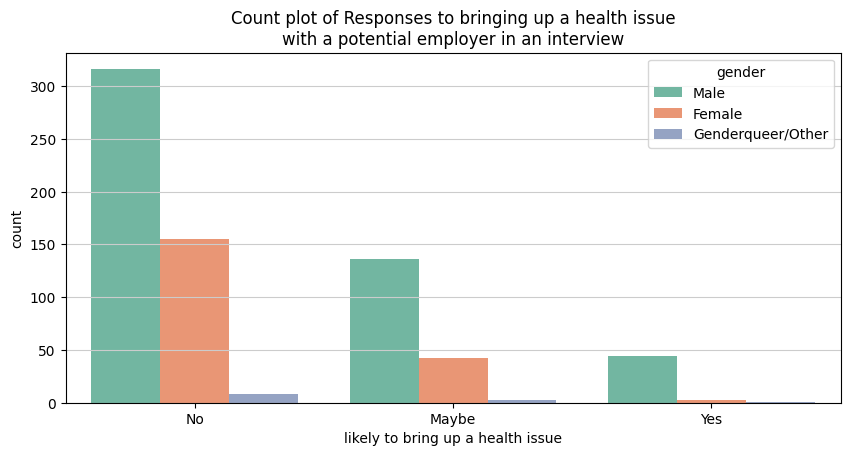

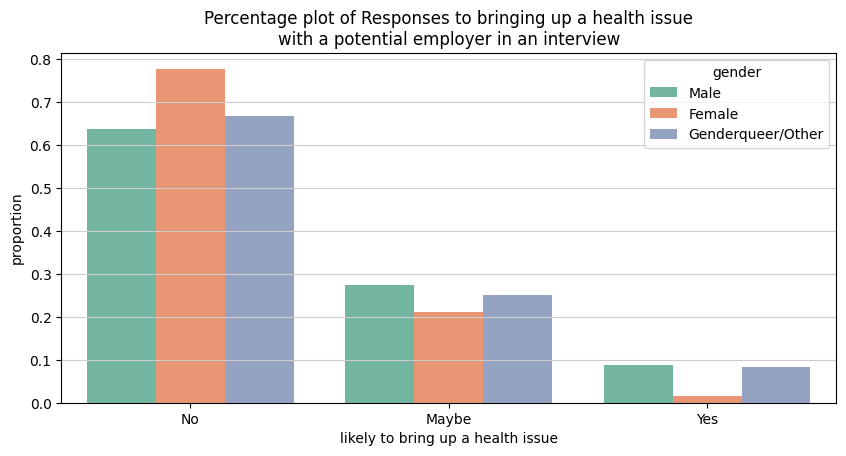

In [37]:
#Plotting count plot and percentage plot of employees with willingness to bring up mental health issue during interview by gender
x, y, hue = "bring_up_during_interview", "proportion", "gender"
hue_order = ["Male", "Female",'GenderQueer/Other']


plt.figure(figsize=(10,10))
plt.subplot(2,1,1)

sns.countplot(x=x, hue=hue, data=survey,order = survey['bring_up_during_interview'].value_counts().index)
plt.title('Count plot of Responses to bringing up a health issue\nwith a potential employer in an interview')
plt.xlabel('likely to bring up a health issue')

prop_df = (survey[x]
           .groupby(survey[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())


plt.figure(figsize=(10,10))
plt.subplot(2, 1,2)

sns.barplot(x=x, y=y, hue=hue, data=prop_df,hue_order = ['Male','Female','Genderqueer/Other'])
plt.title('Percentage plot of Responses to bringing up a health issue\nwith a potential employer in an interview')
plt.xlabel('likely to bring up a health issue')
plt.show()

In [38]:
#Performing NLP on the reasons for bringing up mental health issue during interview
#Seperating the three responses and then generating a word cloud for each
survey1 = survey.query('bring_up_during_interview == "Yes"')
survey2 = survey.query('bring_up_during_interview == "No"')
survey3 = survey.query('bring_up_during_interview == "Maybe"')

col = ['why_bring_up']
survey1.dropna(subset = col,how = 'any',inplace=True)
survey2.dropna(subset = col,how = 'any',inplace=True)
survey3.dropna(subset = col,how = 'any',inplace=True)

survey1.reset_index(drop = True,inplace=True)
survey2.reset_index(drop = True,inplace=True)
survey3.reset_index(drop = True,inplace=True)

survey1['why_bring_up']= survey1['why_bring_up'].astype('str')
survey2['why_bring_up']= survey2['why_bring_up'].astype('str')
survey3['why_bring_up']= survey3['why_bring_up'].astype('str')

In [40]:
!pip install nltk


   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------ ------------------------


[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bugra\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [42]:
# Cleaning the response texts
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus1 = []
corpus2 = []
corpus3 = []
for i in range(0, len(survey1)-1):
    review = re.sub('[^a-zA-Z]', ' ', survey1['why_bring_up'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    for i in review:
          corpus1.append(i)
            

            
for i in range(0, len(survey2)-1):
    review = re.sub('[^a-zA-Z]', ' ', survey2['why_bring_up'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    for i in review:
          corpus2.append(i)
            
            
            
for i in range(0, len(survey3)-1):
    review = re.sub('[^a-zA-Z]', ' ', survey3['why_bring_up'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    for i in review:
          corpus3.append(i)
            
corpus1 = ' '.join(corpus1)
corpus2 = ' '.join(corpus2)
corpus3 = ' '.join(corpus3)



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bugra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [44]:
!pip install wordcloud



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [46]:
from wordcloud import WordCloud


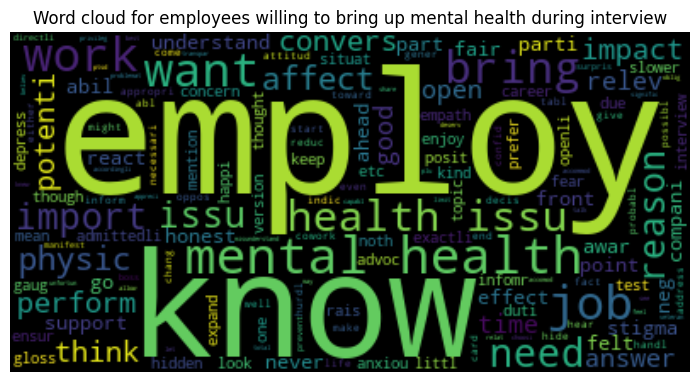

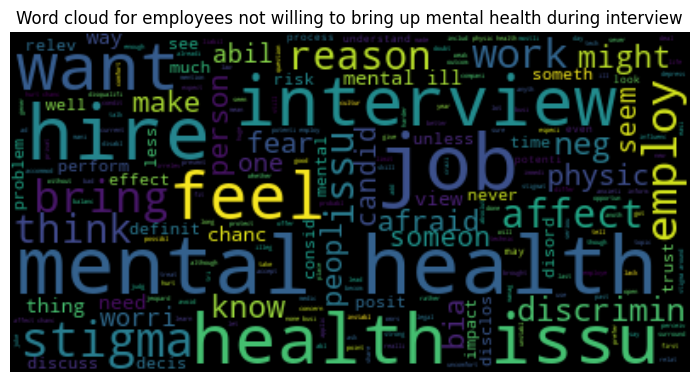

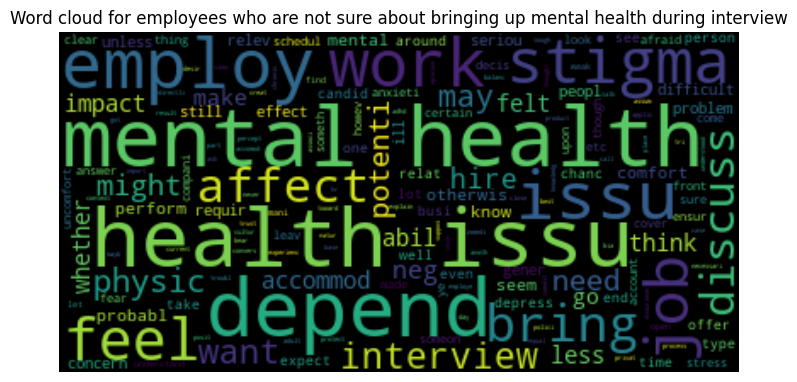

In [47]:

from wordcloud import WordCloud
# Generate a word cloud image
wordcloud1 = WordCloud().generate(corpus1)
wordcloud2 = WordCloud().generate(corpus2)
wordcloud3 = WordCloud().generate(corpus3)



plt.figure(figsize=(15,15))
plt.subplot(3,1,1)
plt.title("Word cloud for employees willing to bring up mental health during interview")
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis("off")

plt.figure(figsize=(15,15))
plt.subplot(3,1,2)
plt.title("Word cloud for employees not willing to bring up mental health during interview")
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")

plt.figure(figsize=(15,15))
plt.subplot(3,1,3)
plt.title("Word cloud for employees who are not sure about bringing up mental health during interview")
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")

plt.show()

In [48]:
survey['will_mental_illness_hurt_career'] = survey['will_mental_illness_hurt_career'].replace([
    'Yes, it has', 'Yes, I think it would'], 'Yes')
survey['will_mental_illness_hurt_career'] = survey['will_mental_illness_hurt_career'].replace([
    'No, it has not', "No, I don't think it would"], 'No')
survey['will_mental_illness_hurt_career'].unique()

array(['No', 'Yes', 'Maybe'], dtype=object)

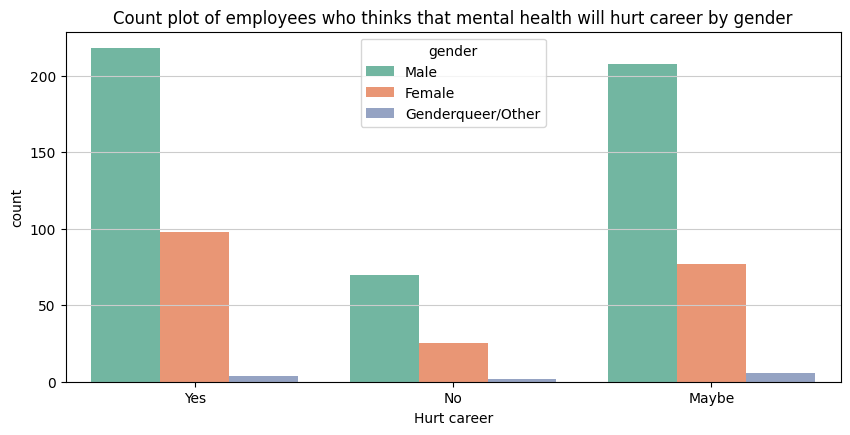

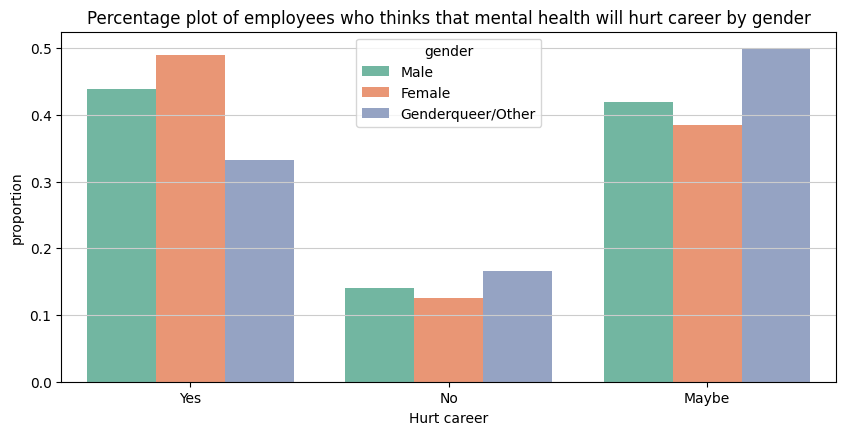

In [49]:
#Plotting count plot and percentage plot of employees who thinks that mental health will hurt career by gender
x, y, hue = "will_mental_illness_hurt_career", "proportion", "gender"
hue_order = ['Male','Female','Genderqueer/Other']


plt.figure(figsize=(10,10))
plt.subplot(2,1,1)

sns.countplot(x=x, hue=hue, data=survey,order=['Yes','No', 'Maybe'])

plt.title('Count plot of employees who thinks that mental health will hurt career by gender')
plt.xlabel('Hurt career')

prop_df = (survey[x]
           .groupby(survey[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())


plt.figure(figsize=(10,10))
plt.subplot(2, 1,2)

sns.barplot(x=x, y=y, hue=hue, data=prop_df,order=['Yes','No', 'Maybe'],hue_order = ['Male','Female','Genderqueer/Other'])


plt.title('Percentage plot of employees who thinks that mental health will hurt career by gender')
plt.xlabel('Hurt career')

plt.show()

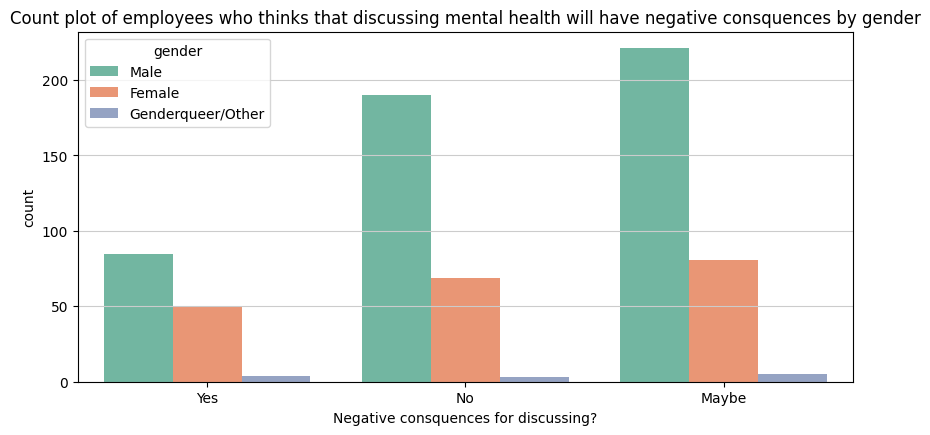

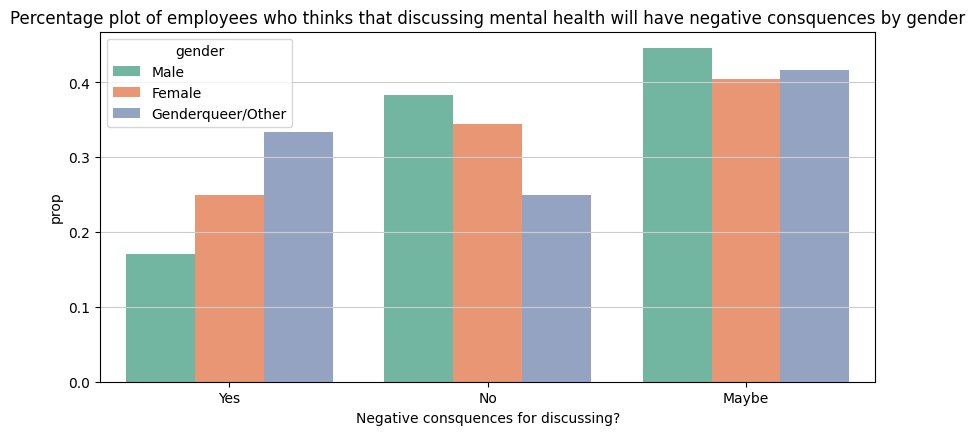

In [50]:
#Plotting count plot and percentage plot of employees who thinks that there are negative consequences for discussing mental health by gender

x, y, hue = "negative_consequences_for_discussing", "prop", "gender"
hue_order = ['Male','Female','Genderqueer/Other']


plt.figure(figsize=(10,10))
plt.subplot(2,1,1)

sns.countplot(x=x, hue=hue, data=survey,order=['Yes','No','Maybe'])

plt.title('Count plot of employees who thinks that discussing mental health will have negative consquences by gender')
plt.xlabel('Negative consquences for discussing?')

prop_df = (survey[x]
           .groupby(survey[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())


plt.figure(figsize=(10,10))
plt.subplot(2, 1,2)

sns.barplot(x=x, y=y, hue=hue, data=prop_df,order = ['Yes','No','Maybe'],hue_order = ['Male','Female','Genderqueer/Other'])

plt.title('Percentage plot of employees who thinks that discussing mental health will have negative consquences by gender')
plt.xlabel('Negative consquences for discussing?')

plt.show()

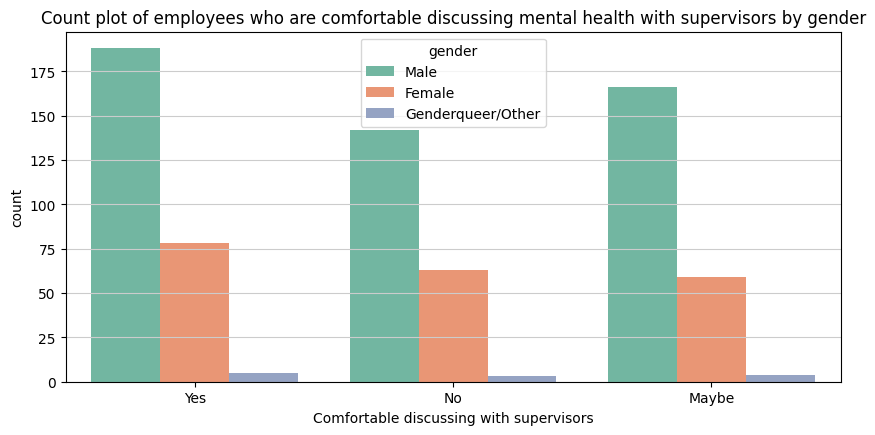

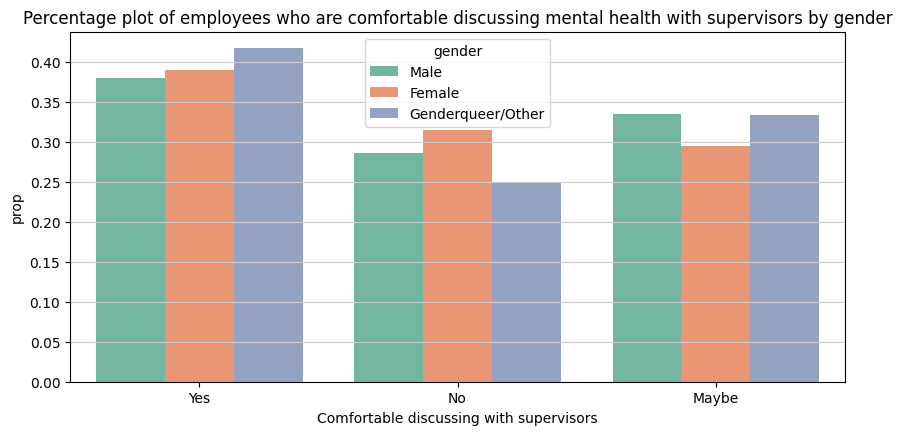

In [51]:
#Plotting count plot and percentage plot of employees who are comfortable discussing mental health with supervisors by gender
x, y, hue = "comfortable_discussing_with_supervisors", "prop", "gender"
hue_order = ['Male','Female','Genderqueer/Other']


plt.figure(figsize=(10,10))
plt.subplot(2,1,1)

sns.countplot(x=x, hue=hue, data=survey,order=['Yes','No','Maybe'])

plt.title('Count plot of employees who are comfortable discussing mental health with supervisors by gender')
plt.xlabel('Comfortable discussing with supervisors')


prop_df = (survey[x]
           .groupby(survey[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())


plt.figure(figsize=(10,10))
plt.subplot(2, 1,2)

sns.barplot(x=x, y=y, hue=hue, data=prop_df,order = ['Yes','No','Maybe'],hue_order = ['Male','Female','Genderqueer/Other'])

plt.title('Percentage plot of employees who are comfortable discussing mental health with supervisors by gender')
plt.xlabel('Comfortable discussing with supervisors')

plt.show()

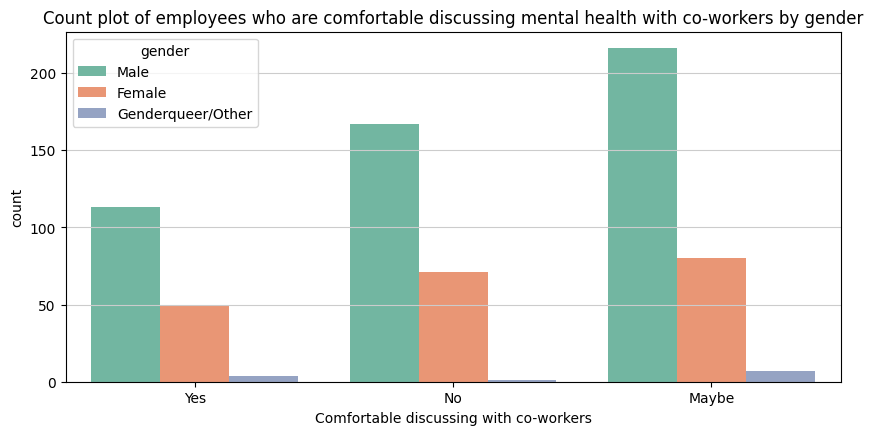

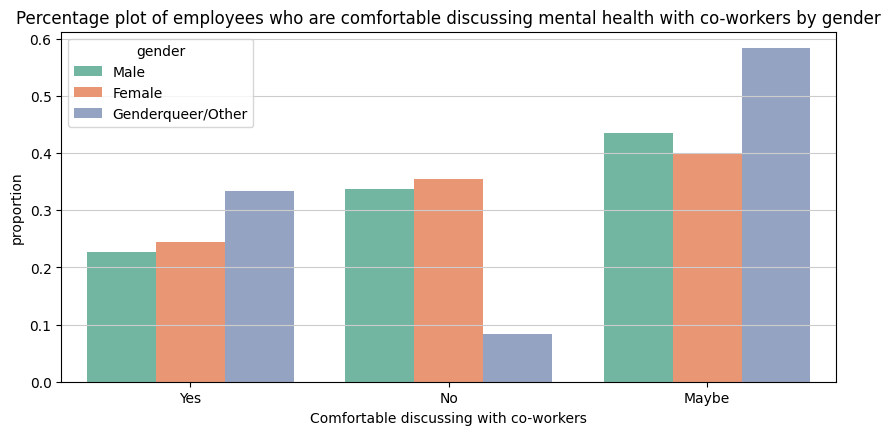

In [52]:
#Plotting count plot and percentage plot of employees who are comfortable discussing mental health with co-workers by gender
x, y, hue = "comfortable_discussing_with_coworkers", "proportion", "gender"
hue_order = ['Male','Female','Genderqueer/Other']


plt.figure(figsize=(10,10))
plt.subplot(2,1,1)

sns.countplot(x=x, hue=hue, data=survey,order=['Yes','No','Maybe'])

plt.title('Count plot of employees who are comfortable discussing mental health with co-workers by gender')
plt.xlabel('Comfortable discussing with co-workers')

prop_df = (survey[x]
           .groupby(survey[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())


plt.figure(figsize=(10,10))
plt.subplot(2, 1,2)

sns.barplot(x=x, y=y, hue=hue, data=prop_df,order = ['Yes','No','Maybe'],hue_order = ['Male','Female','Genderqueer/Other'])

plt.title('Percentage plot of employees who are comfortable discussing mental health with co-workers by gender')
plt.xlabel('Comfortable discussing with co-workers')

plt.show()

In [53]:
survey_8 = survey.query('work_state == "Illinois" | work_state == "New York" | work_state == "Texas" | work_state == "California" | work_state == "Michigan" | work_state == "District of Columbia"| work_state == "Minnesota"| work_state == "Washington"') 

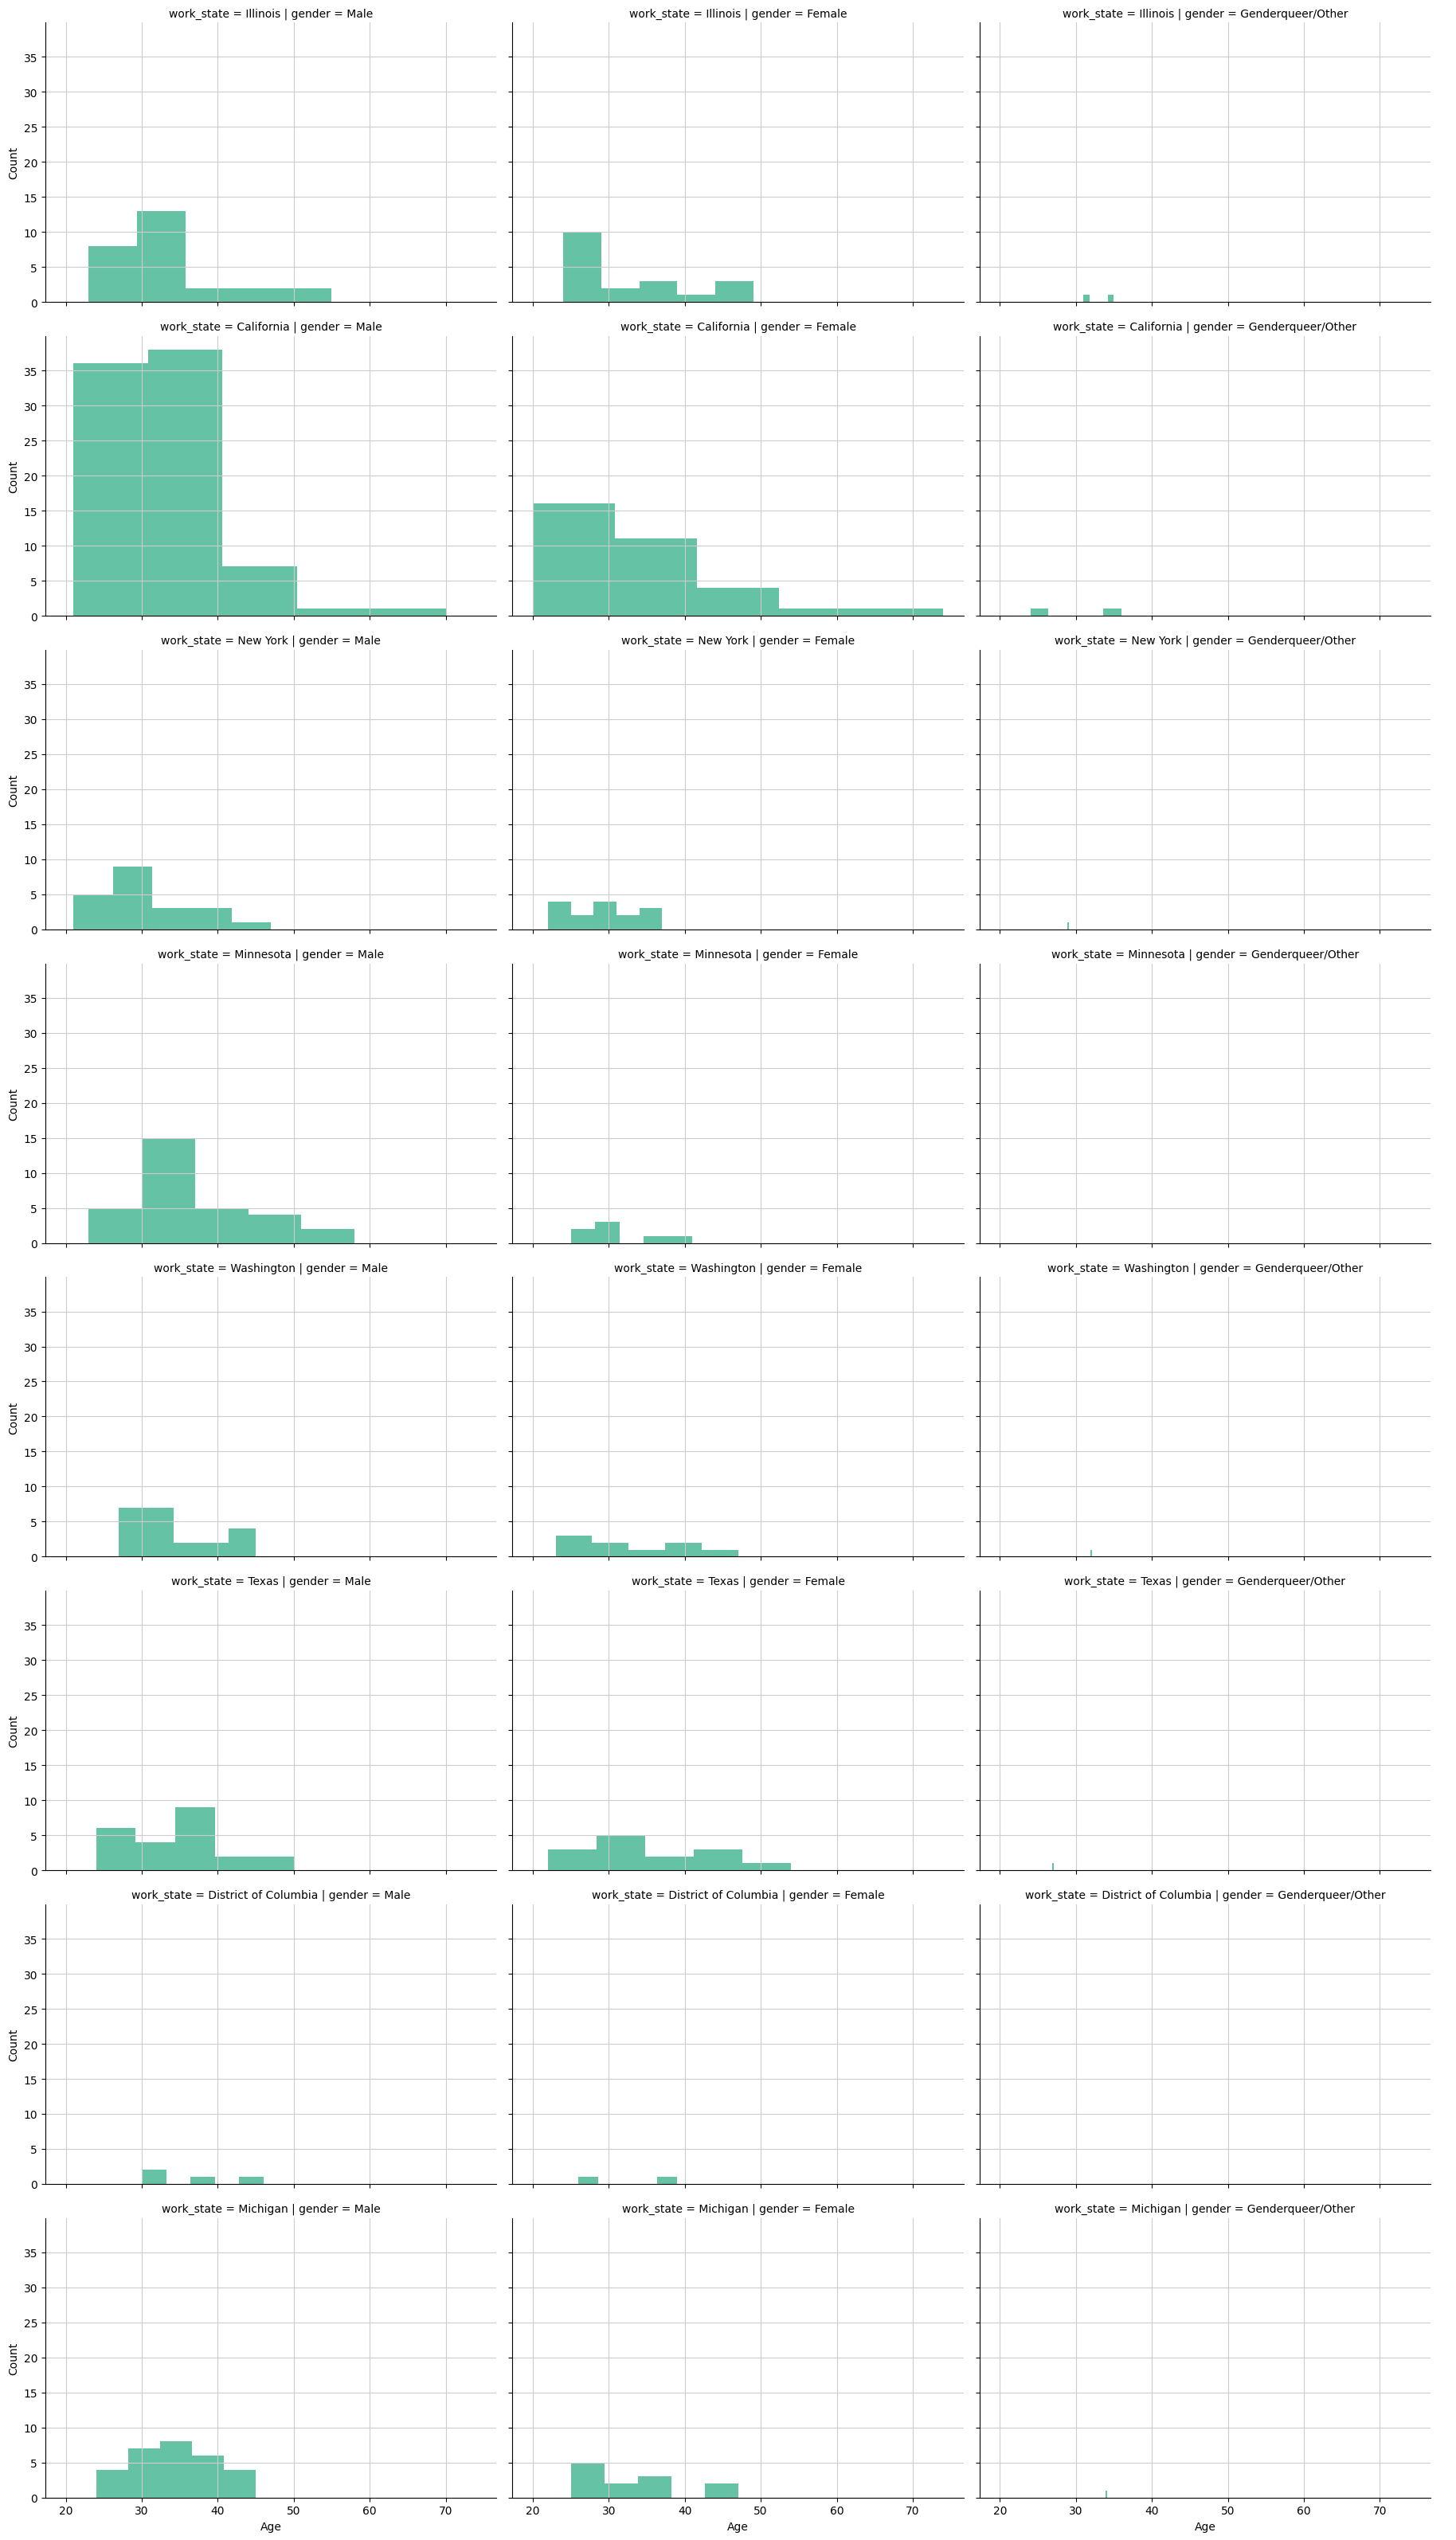

In [55]:
g = sns.FacetGrid(survey_8, row='work_state', col='gender', height=4, aspect=1.5)
g.map(plt.hist, 'age', alpha=1, bins=5)
g.set_axis_labels("Age", "Count")
g.add_legend()
plt.show()


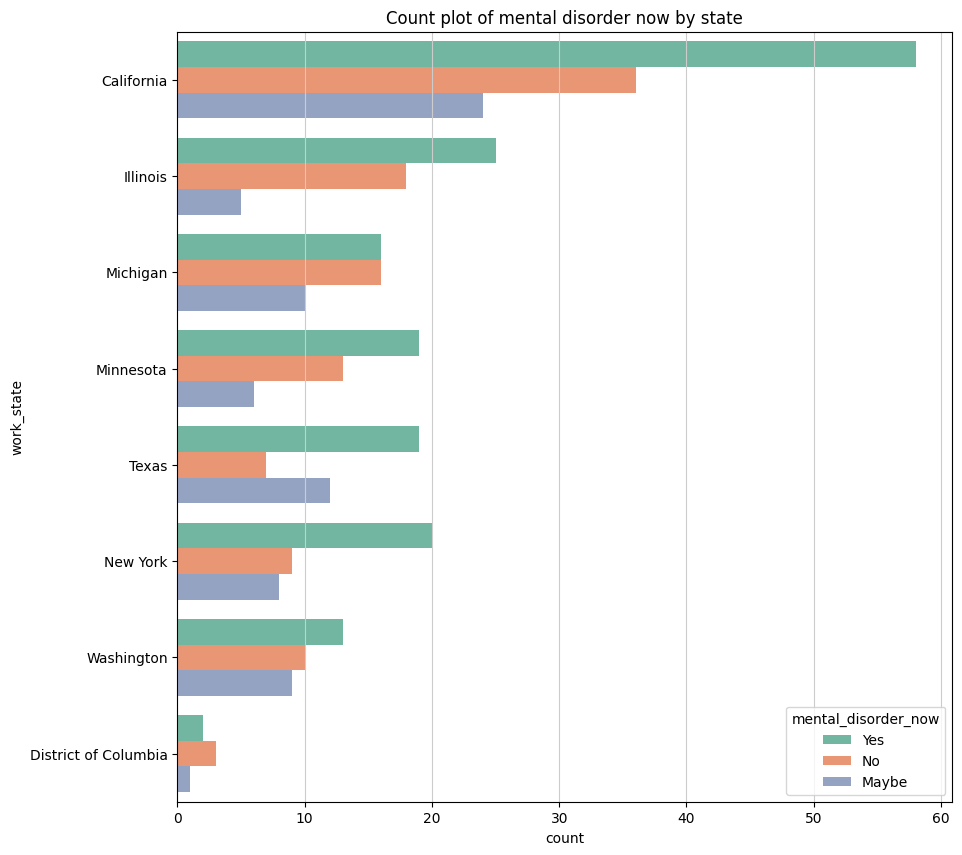

In [56]:
#Count plot of current mental disorder by state
x, y, hue = "work_state", "proportion", "mental_disorder_now"
hue_order = ["Yes", "No",'Maybe']


plt.figure(figsize=(10,10))

sns.countplot(y=x, hue=hue, data=survey_8,order = survey_8['work_state'].value_counts().index)

plt.title('Count plot of mental disorder now by state')




plt.show()

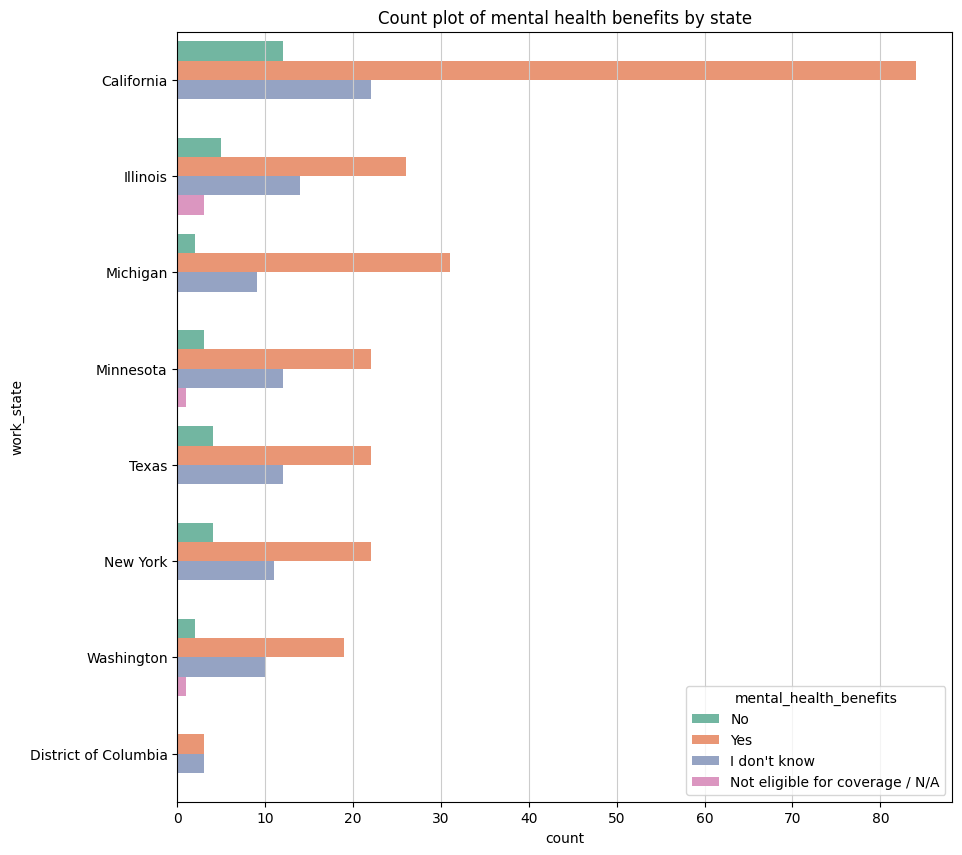

In [57]:
#Count plot of mental health benefits by state
x, y, hue = "work_state", "prop", "mental_health_benefits"
hue_order = ['No' 'Yes' "I don't know" 'Not eligible for coverage / N/A']


plt.figure(figsize=(10,10))

sns.countplot(y=x, hue=hue, data=survey_8,order = survey_8['work_state'].value_counts().index)

plt.title('Count plot of mental health benefits by state')

plt.show()

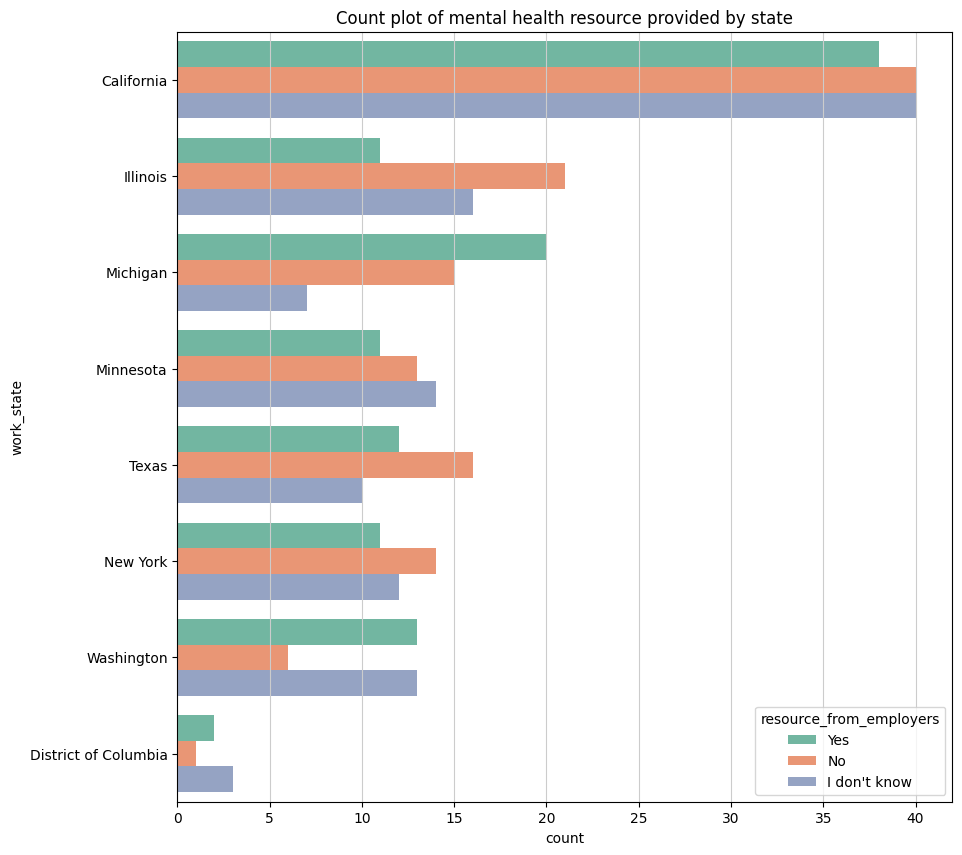

In [58]:
#Count plot of mental health benefits by state
x, y, hue = "work_state", "prop", "resource_from_employers"
hue_order = ["Yes", "No","I don't know"]


plt.figure(figsize=(10,10))


sns.countplot(y=x, hue=hue, data=survey_8,order = survey_8['work_state'].value_counts().index)
plt.title('Count plot of mental health resource provided by state')
plt.show()

In [59]:
# Compressing categories so that they are easier to visualize
survey_8['ease_of_medical_leave'] = survey_8['ease_of_medical_leave'].replace([
    'Somewhat easy', 'Very easy'], 'Easy')
survey_8['ease_of_medical_leave'] = survey_8['ease_of_medical_leave'].replace([
    'Very difficult', 'Somewhat difficult'], 'Difficult')
survey_8['ease_of_medical_leave'].unique()
    

array(['Easy', 'Neither easy nor difficult', 'Difficult', "I don't know"],
      dtype=object)

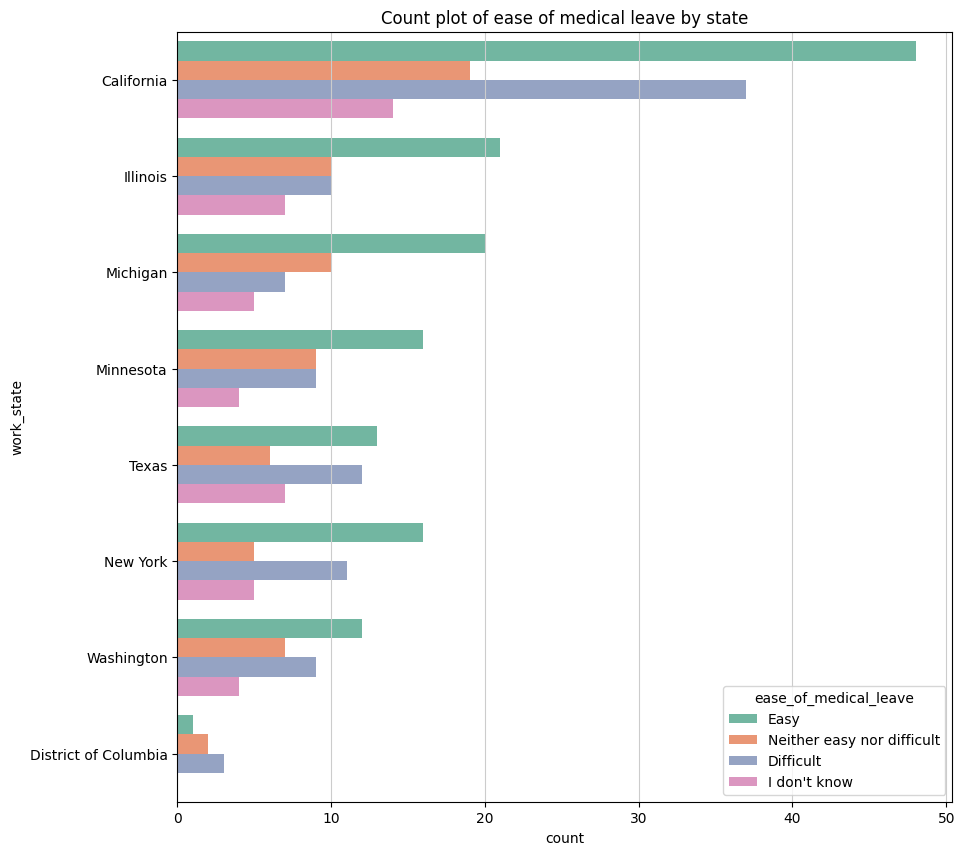

In [60]:
#Count plot of ease of medical leave by state
x, y, hue = "work_state", "prop", "ease_of_medical_leave"
hue_order = ['Easy', 'Neither easy nor difficult', 'Difficult', "I don't know"]


plt.figure(figsize=(10,10))

sns.countplot(y=x, hue=hue, data=survey_8,order = survey_8['work_state'].value_counts().index)
plt.title('Count plot of ease of medical leave by state')

plt.show()